# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key

'58d83d95360a992508cb7423f4e0f183'

In [40]:
import os
os.getcwd()

'C:\\Data_Visualization\\UCFLM20190409DATA\\Homework\\06-Python-APIs\\Instructions\\starter_code'

In [145]:
url= 'http://api.openweathermap.org/data/2.5/weather?units='
units = 'Imperial'
query_url = f'{url}{units}&APPID={api_key}&q='


In [144]:
city = 'austin'
response=requests.get(query_url+city).json()
response

{'coord': {'lon': -97.74, 'lat': 30.27},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 87.33,
  'pressure': 1015,
  'humidity': 40,
  'temp_min': 82.99,
  'temp_max': 91.99},
 'visibility': 16093,
 'wind': {'speed': 3.36, 'deg': 150},
 'clouds': {'all': 1},
 'dt': 1563846906,
 'sys': {'type': 1,
  'id': 3931,
  'message': 0.0098,
  'country': 'US',
  'sunrise': 1563795792,
  'sunset': 1563845475},
 'timezone': -18000,
 'id': 4671654,
 'name': 'Austin',
 'cod': 200}

In [122]:
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


## Generate Cities List

In [157]:
# List for holding lat_lngs and cities
latitude_longitude = []
cities_list = []

# Create a set of random lat and lng combinations
latitude= np.random.uniform(low=-90.000, high=90.000, size=600)
longitude= np.random.uniform(low=-180.000, high=180.000, size=600)
latitude_longitude= zip(latitude, longitude)

# Identify nearest city for each lat, lng combination
for x in latitude_longitude:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities_list.append(city)
        #cities.append(country)
        #cities.append(Latitude)
        #cities.append(Longitude)

# Print the city list count
len(cities_list)

600

In [158]:
cities_list[:20]

['portland',
 'bluff',
 'pevek',
 'novoyegoryevskoye',
 'broome',
 'kapaa',
 'chuy',
 'cuamba',
 'bathsheba',
 'victoria',
 'obodivka',
 'severo-kurilsk',
 'taolanaro',
 'olinda',
 'talnakh',
 'bredasdorp',
 'nikolskoye',
 'ilulissat',
 'illoqqortoormiut',
 'inta']

In [90]:
citipy.nearest_city(x[0], x[1]).city_name

'kyabe'

In [57]:
# Create empty data frame and add columns for city, country, latitude and longitude
column_names = ('city_name', 'country_code', 'Latitude', 'Longitude')
cities = pd.DataFrame(columns = column_names)
cities

,city_name,country_code,Latitude,Longitude


In [147]:
url= 'http://api.openweathermap.org/data/2.5/weather?units='
units = 'Imperial'
query_url = f'{url}{units}&APPID={api_key}&q='

In [172]:
 # Add retrieved data into cities_list data frame
       # set lists for the dataframe
city_found = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns and convert to integer
for city in cities_list:
            
    response = requests.get(query_url + city).json()
    
    print(f'Fetching data for {city}.')

    try:
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
       
        city_found.append(city) 
             
    except:
        print(f"**Weather data does not exist for {city}")
        continue
              
    

Fetching data for portland.
Fetching data for bluff.
Fetching data for pevek.
Fetching data for novoyegoryevskoye.
**Weather data does not exist for novoyegoryevskoye
Fetching data for broome.
Fetching data for kapaa.
Fetching data for chuy.
Fetching data for cuamba.
Fetching data for bathsheba.
Fetching data for victoria.
Fetching data for obodivka.
Fetching data for severo-kurilsk.
Fetching data for taolanaro.
**Weather data does not exist for taolanaro
Fetching data for olinda.
Fetching data for talnakh.
Fetching data for bredasdorp.
Fetching data for nikolskoye.
Fetching data for ilulissat.
Fetching data for illoqqortoormiut.
**Weather data does not exist for illoqqortoormiut
Fetching data for inta.
Fetching data for saleaula.
**Weather data does not exist for saleaula
Fetching data for busselton.
Fetching data for hilo.
Fetching data for busselton.
Fetching data for busselton.
Fetching data for coquimbo.
Fetching data for kutum.
Fetching data for faanui.
Fetching data for illoqqor

Fetching data for punta arenas.
Fetching data for vaini.
Fetching data for albany.
Fetching data for mataura.
Fetching data for moron.
Fetching data for samarai.
Fetching data for vaini.
Fetching data for yellowknife.
Fetching data for hermanus.
Fetching data for zapolyarnyy.
Fetching data for baoqing.
Fetching data for mount gambier.
Fetching data for yellowknife.
Fetching data for doha.
Fetching data for necochea.
Fetching data for kapaa.
Fetching data for panjakent.
Fetching data for ribeirao.
Fetching data for hobart.
Fetching data for punta arenas.
Fetching data for juneau.
Fetching data for rungata.
**Weather data does not exist for rungata
Fetching data for gayny.
Fetching data for porto novo.
Fetching data for atkinson.
Fetching data for sitka.
Fetching data for nikolskoye.
Fetching data for warqla.
**Weather data does not exist for warqla
Fetching data for esperance.
Fetching data for ilulissat.
Fetching data for taolanaro.
**Weather data does not exist for taolanaro
Fetching 

Fetching data for pop.
Fetching data for samusu.
**Weather data does not exist for samusu
Fetching data for tanshui.
**Weather data does not exist for tanshui
Fetching data for quatre cocos.
Fetching data for haines junction.
Fetching data for ushuaia.
Fetching data for rikitea.
Fetching data for evensk.
Fetching data for cape town.
Fetching data for bathsheba.
Fetching data for san rafael del sur.
Fetching data for punta arenas.
Fetching data for mataura.
Fetching data for punta arenas.
Fetching data for lebu.
Fetching data for hilo.
Fetching data for jamestown.
Fetching data for russell.
Fetching data for port elizabeth.
Fetching data for puerto ayora.
Fetching data for bur gabo.
**Weather data does not exist for bur gabo
Fetching data for jamestown.
Fetching data for sur.
Fetching data for santa maria.
Fetching data for codajas.
Fetching data for geraldton.
Fetching data for kholmogory.
Fetching data for grand river south east.
**Weather data does not exist for grand river south eas

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [176]:
city_dict = {
    "city": city_found,
    "lat": lats,
    "lon": lngs,
    "temp": max_temps,
    "humidity": humidities,
      "cloud": cloudinesses,
      "wind": wind_speeds            
}

# Creates DF based on appended lists
weather_data = pd.DataFrame(city_dict)

# Writes DF to csv
weather_data.head(500).to_csv(path_or_buf = 'weather_data.csv', sep = ',', index = False)
weather_data.head(10)

,city,lat,lon,temp,humidity,cloud,wind
0,portland,43.66,-70.25,64.99,93,90,0.51
1,bluff,-23.58,149.07,73.48,42,0,4.47
2,pevek,69.70,170.27,31.72,98,100,12.55
3,broome,52.47,1.45,66.00,93,1,3.36
4,kapaa,22.08,-159.32,78.80,83,75,9.17
5,chuy,-33.69,-53.46,54.04,89,100,13.85
6,cuamba,-14.80,36.54,49.72,95,0,4.97
7,bathsheba,13.22,-59.52,80.60,83,75,21.92
8,victoria,5.28,115.24,84.20,74,75,5.82
9,obodivka,49.63,26.02,59.44,91,100,6.22


In [177]:
# READ IN CSV
weather_data = pd.read_csv('weather_data.csv', sep = ',')
weather_data.head(10)

,city,lat,lon,temp,humidity,cloud,wind
0,portland,43.66,-70.25,64.99,93,90,0.51
1,bluff,-23.58,149.07,73.48,42,0,4.47
2,pevek,69.70,170.27,31.72,98,100,12.55
3,broome,52.47,1.45,66.00,93,1,3.36
4,kapaa,22.08,-159.32,78.80,83,75,9.17
5,chuy,-33.69,-53.46,54.04,89,100,13.85
6,cuamba,-14.80,36.54,49.72,95,0,4.97
7,bathsheba,13.22,-59.52,80.60,83,75,21.92
8,victoria,5.28,115.24,84.20,74,75,5.82
9,obodivka,49.63,26.02,59.44,91,100,6.22


In [178]:
weather_data.shape

(546, 7)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

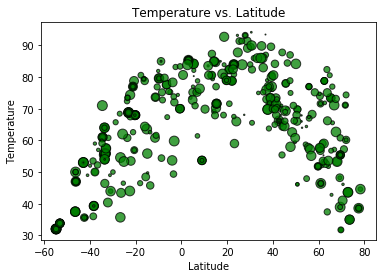

<Figure size 432x288 with 0 Axes>

In [200]:
#Define the axis
x=lats
y=max_temps

# Build a scatter plot
plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black", s=x_axis, alpha=0.75)

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.show(True)

# Save the figure
plt.savefig("Temperaturevs.Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

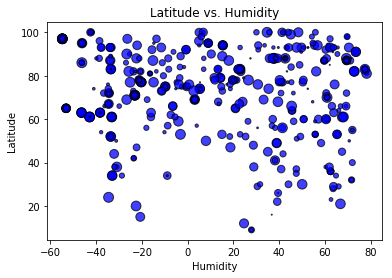

<Figure size 432x288 with 0 Axes>

In [201]:
#Define the axis
x=lats
y=humidities


# Build a scatter plot
plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.show(True)

# Save the figure
plt.savefig("Latitudevs.Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

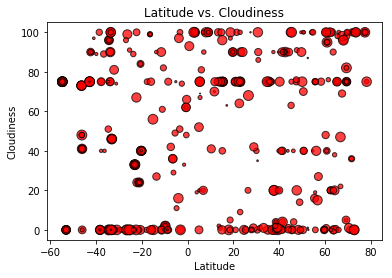

<Figure size 432x288 with 0 Axes>

In [202]:
#Define the axis
x=lats
y=cloudinesses

# Build a scatter plot
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show(True)

# Save the figure
plt.savefig("Latitudevs.Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

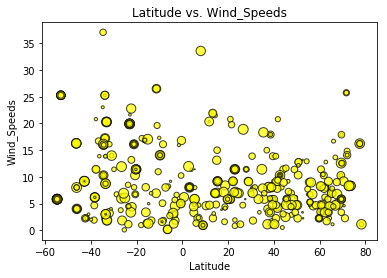

<Figure size 432x288 with 0 Axes>

In [203]:
#Define axis
x=lats
y=wind_speeds

# Build a scatter plot
plt.scatter(x, y, marker="o", facecolors="yellow", edgecolors="black", s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("Latitude vs. Wind_Speeds")
plt.ylabel("Wind_Speeds")
plt.xlabel("Latitude")
plt.show(True)

# Save the figure
plt.savefig("Latitudevs.Wind_Speeds.png")

# Show plot
plt.show()